<a href="https://colab.research.google.com/github/Swapn2/Data-Science-Learnings/blob/main/PCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd

In [3]:
import numpy as np
import pandas as pd

np.random.seed(23)

mu_vec1 = np.array([0,0,0])
cov_mat1 = np.array([[1,0,0],[0,1,0],[0,0,1]])
class1_sample = np.random.multivariate_normal(mu_vec1,cov_mat1,20)

df = pd.DataFrame(class1_sample , columns = ['feature1','feature2','feature3'])
df['target'] = 1

mu_vec2 = np.array([1,1,1])
cov_mat2 = np.array([[1,0,0],[0,1,0],[0,0,1]])
class2_sample = np.random.multivariate_normal(mu_vec2,cov_mat2, 20)

df1 = pd.DataFrame(class2_sample,columns = ['feature1','feature2','feature3'])
df1['target'] = 0

# Use pd.concat instead of df.append
df = pd.concat([df, df1], ignore_index=True)

df = df.sample(40)

# print(df)


In [4]:
df.head()

,feature1,feature2,feature3,target
2,-0.367548,-1.137460,-1.322148,1
34,0.177061,-0.598109,1.226512,0
14,0.420623,0.411620,-0.071324,1
11,1.968435,-0.547788,-0.679418,1
12,-2.506230,0.146960,0.606195,1


In [5]:
df

,feature1,feature2,feature3,target
2,-0.367548,-1.137460,-1.322148,1
34,0.177061,-0.598109,1.226512,0
14,0.420623,0.411620,-0.071324,1
11,1.968435,-0.547788,-0.679418,1
12,-2.506230,0.146960,0.606195,1
29,1.425140,1.441152,0.182561,0
31,2.224431,0.230401,1.192120,0
4,0.322272,0.060343,-1.043450,1
32,-0.723253,1.461259,-0.085367,0
33,2.823378,-0.332863,2.637391,0


In [6]:
import plotly.express as px
fig = px.scatter_3d(df, x = df['feature1'], y = df['feature2'], z = df['feature3'],
                   color = df['target'].astype('str'))
fig.update_traces(marker = dict(size=12,
                               line = dict(width = 2,
                                          color = 'DarkSlateGrey')),
                 selector = dict(mode = 'markers'))
fig.show()

In [7]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

df.iloc[:,0:3] = scaler.fit_transform(df.iloc[:,0:3])

In [8]:
df

,feature1,feature2,feature3,target
2,-0.700809,-1.525586,-1.749156,1
34,-0.224481,-1.010757,0.491251,0
14,-0.011456,-0.046935,-0.649616,1
11,1.342296,-0.962723,-1.184163,1
12,-2.571350,-0.299561,-0.054040,1
29,0.867118,0.935791,-0.426437,0
31,1.566196,-0.219914,0.461019,0
4,-0.097477,-0.382241,-1.504166,1
32,-1.011917,0.954984,-0.661960,0
33,2.090049,-0.757570,1.731490,0


In [9]:
cov_mat = np.cov([df.iloc[:,0],df.iloc[:,1],df.iloc[:,2]])
cov_mat

array([[1.02564103, 0.20478114, 0.080118  ],
       [0.20478114, 1.02564103, 0.19838882],
       [0.080118  , 0.19838882, 1.02564103]])

In [10]:
eigen_value,eigen_vector = np.linalg.eig(cov_mat)

In [11]:
eigen_value

array([1.3536065 , 0.94557084, 0.77774573])

In [12]:
eigen_vector

array([[-0.53875915, -0.69363291,  0.47813384],
       [-0.65608325, -0.01057596, -0.75461442],
       [-0.52848211,  0.72025103,  0.44938304]])

Populating the interactive namespace from numpy and matplotlib


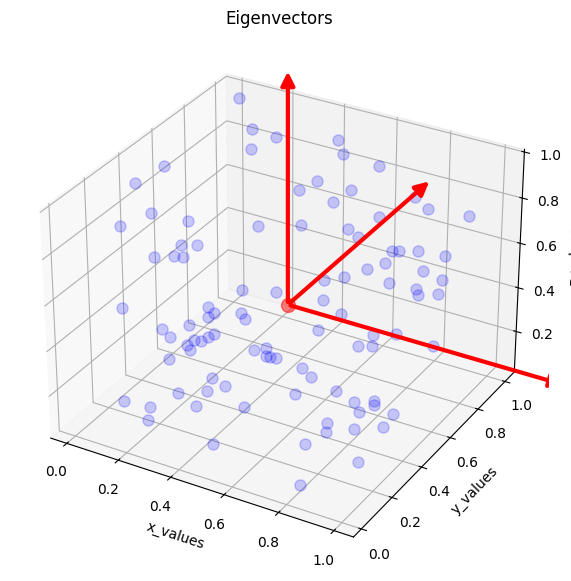

   feature1  feature2  feature3  target
0  0.033748  0.711908  0.459469       1
1  0.590739  0.773652  0.849848       0
2  0.964302  0.577353  0.730308       1
3  0.472972  0.425043  0.314372       1
4  0.839032  0.643177  0.370927       1


In [13]:
%pylab inline

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d import proj3d
from matplotlib.patches import FancyArrowPatch

class Arrow3D(FancyArrowPatch):
    def __init__(self, xs, ys, zs, *args, **kwargs):
        FancyArrowPatch.__init__(self, (0, 0), (0, 0), *args, **kwargs)
        self._verts3d = xs, ys, zs

    def draw(self, renderer):
        xs3d, ys3d, zs3d = self._verts3d
        xs, ys, zs = proj3d.proj_transform(xs3d, ys3d, zs3d, plt.gca().get_proj())
        self.set_positions((xs[0], ys[0]), (xs[1], ys[1]))
        FancyArrowPatch.draw(self, renderer)

    def do_3d_projection(self, renderer=None):
        xs3d, ys3d, zs3d = self._verts3d
        xs, ys, zs = proj3d.proj_transform(xs3d, ys3d, zs3d, plt.gca().get_proj())
        self.set_positions((xs[0], ys[0]), (xs[1], ys[1]))
        return np.min(zs)

fig = plt.figure(figsize=(7, 7))
ax = fig.add_subplot(111, projection='3d')

# Example data with a target column
df = pd.DataFrame({
    'feature1': np.random.rand(100),
    'feature2': np.random.rand(100),
    'feature3': np.random.rand(100),
    'target': np.random.randint(0, 2, size=100)
})

# Ensure target column is retained
target = df['target']

# Calculate the mean for the eigen vector plot
mean_feature1 = df['feature1'].mean()
mean_feature2 = df['feature2'].mean()
mean_feature3 = df['feature3'].mean()

eigen_vector = np.array([[1, 0, 0], [0, 1, 0], [0, 0, 1]])

ax.plot(df['feature1'], df['feature2'], df['feature3'], 'o', markersize=8, color='blue', alpha=0.2)
ax.plot([mean_feature1], [mean_feature2], [mean_feature3], 'o', markersize=10, color='red', alpha=0.5)

for v in eigen_vector.T:
    a = Arrow3D([mean_feature1, mean_feature1 + v[0]],
                [mean_feature2, mean_feature2 + v[1]],
                [mean_feature3, mean_feature3 + v[2]],
                mutation_scale=20, lw=3, arrowstyle="-|>", color="r")
    ax.add_artist(a)

ax.set_xlabel('x_values')
ax.set_ylabel('y_values')
ax.set_zlabel('z_values')

plt.title('Eigenvectors')

plt.show()

# Print the original DataFrame to verify the target column is retained
print(df.head())
